In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from ipywidgets import interact

%matplotlib inline

from lg_mode_generation import LG_mode_generation

# Load the model with sample config (pure Gaussian beam)

In [2]:
lg_mode = LG_mode_generation('attosecond')
lg_mode.calculate_field()

Calculating LG modes...OK!
Calculating reflected fields...OK!
Calculating field spectrum...OK!
Finished training in 9.293373 seconds.


True

# Attosecond pulse generation

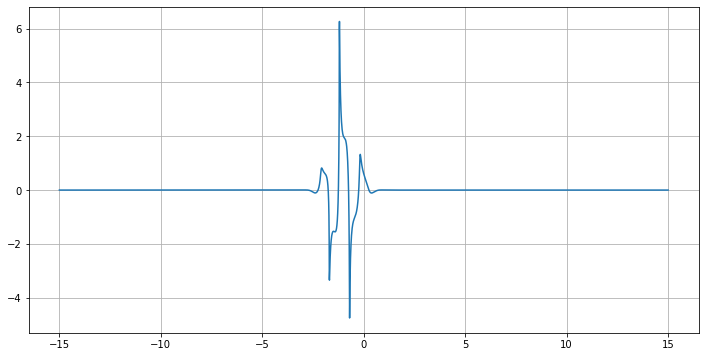

In [7]:
plt.figure(figsize=(12,6))
plt.plot(np.linspace(lg_mode.zmin, lg_mode.zmax, lg_mode.nofzs), lg_mode.refl_field[0,2])
plt.grid()
plt.show()

In [16]:
cfreq, freq_width = (40, 10)
cut_func1 = np.exp(-((freqs-cfreq)/freq_width)**10)
cut_func2 = np.exp(-((freqs+cfreq)/freq_width)**10)
cut_func_total = (cut_func1+ cut_func2)
spectrum_filtered = cut_func_total *  lg_mode.fft_result[0,2]

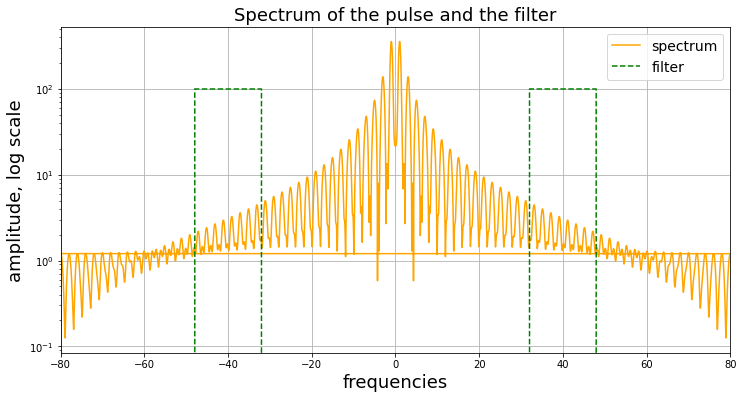

In [111]:
freqs = 2*np.pi*lg_mode.fft_freq
plt.figure(figsize=(12,6))
plt.title("Spectrum of the pulse and the filter", fontsize=18)
plt.grid()

plt.semilogy(freqs,np.abs(lg_mode.fft_result[0,2]), label='spectrum', c='orange')
plt.plot(freqs,100*(cut_func_total>0.9), label='filter', linestyle='--', c='green')
plt.xlim((-80,80))
plt.xlabel("frequencies", fontsize=18)
plt.ylabel("amplitude, log scale", fontsize=18)
plt.legend(fontsize=14)
plt.show()

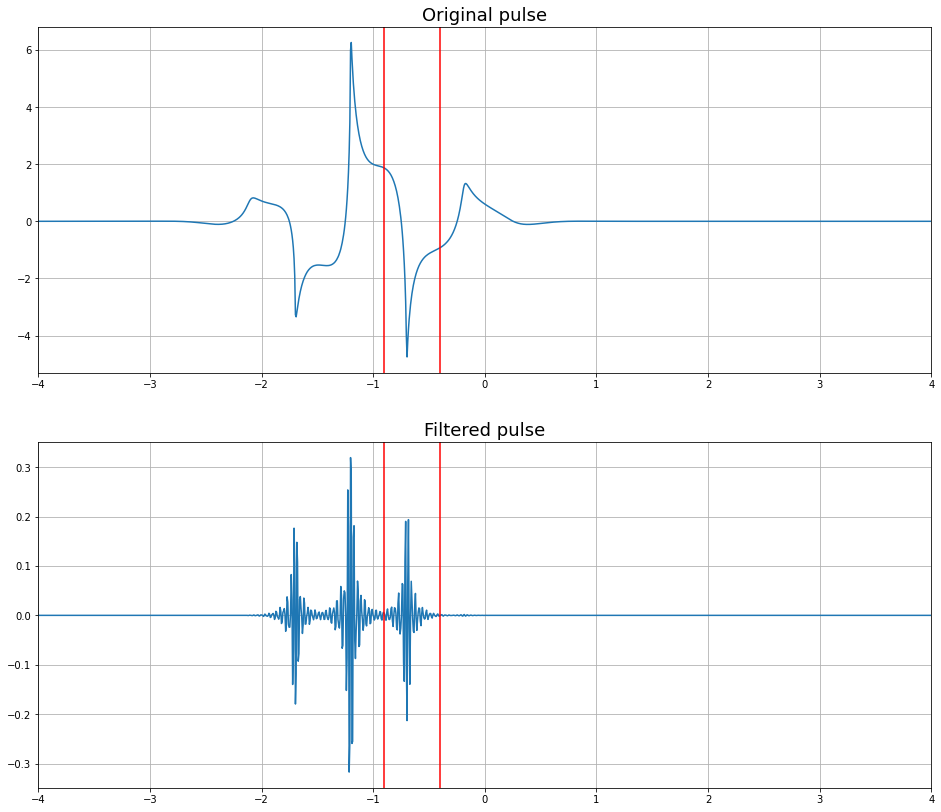

In [88]:
fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(211)
ax.set_title(f"Original pulse", fontsize=18)
ax.plot(np.linspace(lg_mode.zmin, lg_mode.zmax, lg_mode.nofzs), lg_mode.refl_field[0,2])
ax.axvline(x=-0.9, c='red')
ax.axvline(x=-0.4, c='red')
ax.grid()
ax.set_xlim(-4,4)
ax = fig.add_subplot(212)
ax.set_title(f"Filtered pulse", fontsize=18)
#ax.gca(projection="polar")
ax.plot(np.linspace(lg_mode.zmin, lg_mode.zmax, lg_mode.nofzs), np.real(np.fft.ifft(spectrum_filtered)))
ax.grid()
ax.axvline(x=-0.9, c='red')
ax.axvline(x=-0.4, c='red')
ax.set_xlim(-4,4)
plt.show()

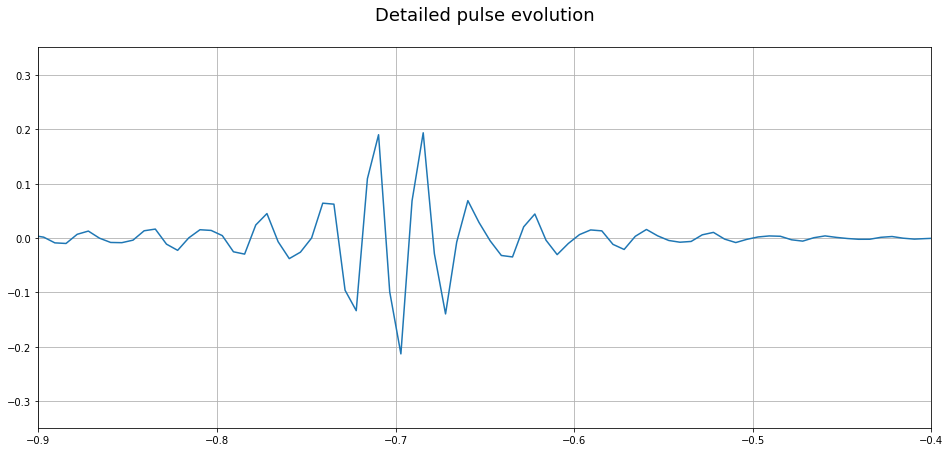

In [92]:
plt.figure(figsize=(16,7))
plt.plot(np.linspace(lg_mode.zmin, lg_mode.zmax, lg_mode.nofzs), np.real(np.fft.ifft(spectrum_filtered)))
plt.title("Detailed pulse evolution\n", fontsize=18)
plt.grid()
#plt.axvline(x=-0.71, c='green', linestyle="--")
#plt.axvline(x=-0.685, c='green', linestyle="--")
plt.xlim(-0.9,-0.4)
plt.show()

The duration of the selected slice (in $\mu$m) is 0.025

In [53]:
mum_length = 0.025
omega = 2*np.pi*(3*10**10)/(mum_length*1e-4)
print("The duration of such pulse is %.3f attoseconds." %(2*np.pi/omega*1e18))

The duration of such pulse is 83.333 attoseconds.


In [115]:
lg_mode.refl_field.shape

(150, 20, 4800)

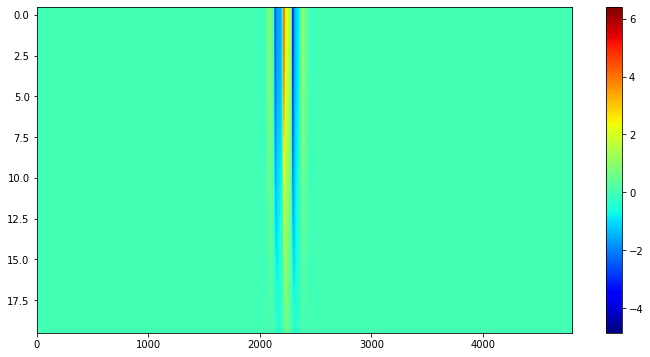

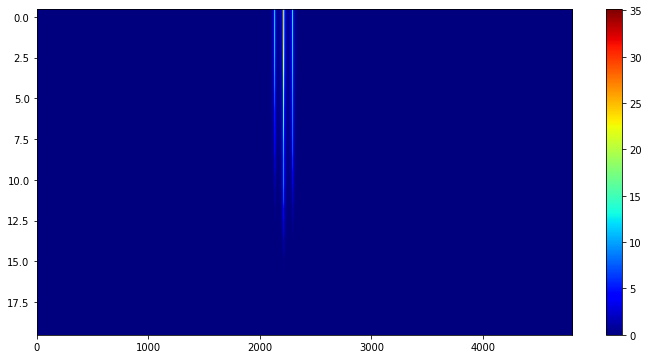

In [132]:
plt.figure(figsize=(12,6))

plt.imshow(lg_mode.refl_field[2],
           aspect='auto', 
           cmap=plt.get_cmap('jet'))
plt.colorbar()
#plt.show()
#lt.savefig("angular_inp.png")
plt.figure(figsize=(12,6))

plt.imshow(100*np.abs(np.fft.ifft(np.fft.fft(lg_mode.refl_field[2],
                                          axis=1)*cut_func_total)), 
           aspect='auto',
           cmap=plt.get_cmap('jet'))
#plt.show()
plt.colorbar()
#lt.savefig("angular_res.png")

In [ ]:
field_cartesian = get_field_cartesian()

In [ ]:
from pyevtk.hl import pointsToVTK
from pyevtk.hl import gridToVTK

#gridToVTK("./test_potential", x/np.amax(x), y/np.amax(y), z/np.amax(z), pointData = {"field_x" : field_x})

filename='./test_field'
gridToVTK(filename, x/np.amax(x), y/np.amax(y), z/np.amax(z), pointData = {"field_x" : field_x})

In [ ]:
import pyevtk
x = np.linspace(-10,9, 4800)
y = np.linspace(0, 2*np.pi, 4800)
z = np.linspace(-15,15, 4800)

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(np.real(np.fft.ifft(np.fft.fft(lg_mode.refl_field[50],axis=1)*cut_func_total)), aspect='auto')
plt.show()

In [ ]:
fourier_res = np.fft.rfft(lg_mode.refl_field, axis=2)
freq = np.fft.rfftfreq(2400, lg_mode.d_sampling_rate)

In [ ]:
filtered = np.fft.irfft(fourier_res*mask, axis=2)

In [ ]:
plt.plot(filtered[21,5][:200])
plt.show()
plt.plot(lg_mode.refl_field[21,5][:200])
plt.show()

In [ ]:
plt.plot(lg_mode.refl_field[21,5][:200])

In [ ]:
@interact(n=(0,2399,5))
def Plotter(n=0):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(121, projection='polar')
    ax.set_title(f"Original field")
    ax.pcolormesh(phi,r,np.transpose(lg_mode.refl_field, [1,0,2])[:,:,n])

    ax = fig.add_subplot(122, projection='polar')
    ax.set_title(f"Filtered field")
    #ax.gca(projection="polar")
    ax.pcolormesh(phi,r,np.transpose(filtered, [1,0,2])[:,:,n])

In [ ]:
r = np.linspace(0,19,20)
phi = np.linspace(0,2*np.pi,150)
rhos, phis = np.meshgrid(r,phi)
@interact(n=(0,2399,5))
def Plotter(n=0):
    plt.figure(figsize=(7,7))
    plt.gca(projection="polar")
    plt.pcolormesh(phi,r,np.transpose(filtered, [1,0,2])[:,:,n])
    #plt.savefig("field_%.4d.png"%n)

In [ ]:
lg_mode.fft_freq[:20]

In [ ]:
@interact(n=(0,2399,5))
def Plotter(n=0):
    plt.figure(figsize=(7,7))
    plt.gca(projection="polar")
    plt.pcolormesh(phi,r,np.transpose(lg_mode.refl_field, [1,0,2])[:,:,n])
    #plt.savefig("field_%.4d.png"%n)

In [ ]:
sp_ = lg_mode.count_spectrogram(r=9)

In [ ]:
sp_.shape

In [ ]:
plt.figure(figsize=(10,10))

plt.imshow(np.angle(sp_[:,:,0]), aspect='auto')
plt.xlabel("Temporal axis", fontsize=30)
plt.ylabel("Spatial angle", fontsize=30)
plt.savefig("self_torque.png")

In [ ]:
#lg_mode.refl_field.shape

In [ ]:
#lg_mode.z[0,0,:]/2/np.pi

In [ ]:
#spectrogram = lg_mode.count_spectrogram(r=10, n_harmonics=3)

In [ ]:
np.save("spectrogram_3rd_harmonics.npy", spectrogram)

In [ ]:
spectrogram = np.load("spectrogram_3rd_harmonics.npy")
print(spectrogram.shape)
spectrogram = spectrogram[:,:,:,0]

In [ ]:
#spectrogram.shape

In [ ]:
#spectrogram.reshape(-1,300)

In [ ]:
r = np.linspace(0,19,20)
phi = np.linspace(0,2*np.pi,150)
rhos, phis = np.meshgrid(r,phi)

In [ ]:
spectrogram.shape

In [ ]:
from ipywidgets import interact
@interact(n=(0,299))
def Plotter(n=0):
    plt.figure(figsize=(4,4))
    plt.gca(projection="polar")
    plt.pcolormesh(phi,r,np.abs(spectrogram[:,:,n]))

In [ ]:
lg_mode.refl_field.shape

In [ ]:
spectrogram.shape

In [ ]:
np.transpose(lg_mode.refl_field, [1,0,2]).shape

In [ ]:
refl_field = np.transpose(lg_mode.refl_field,[1,0,2])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
@interact(n=(0,2400,5))
def Plotter(n=0):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_title(f"3d visualization of spectrogram, slice no. is {n}\n\n\n")
    rhos, phis = np.meshgrid(r,phi)
    X, Y = rhos * np.cos(phis), rhos * np.sin(phis)
    ax.plot_surface(X, Y, refl_field[:,:,n].T, cmap=plt.cm.YlGnBu_r)
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    ax.set_zlim(-1,1)
    ax = fig.add_subplot(122, projection='polar')
    ax.set_title(f"2d visualization of spectrogram, slice no. is {n}")
    #ax.gca(projection="polar")
    ax.pcolormesh(phi,r,refl_field[:,:,n])
    plt.savefig("slice.png")

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
@interact(n=(0,2400,5))
def Plotter(n=0):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(121, projection='polar')
    ax.set_title(f"2d visualization of spectrogram, slice no. is {n}")
    rhos, phis = np.meshgrid(r,phi)
    X, Y = rhos * np.cos(phis), rhos * np.sin(phis)
    ax.pcolormesh(phi,r,refl_field[:,:,n])
    #ax.set_xlim(-20,20)
    #ax.set_ylim(-20,20)
    #ax.set_zlim(-1,1)
    ax = fig.add_subplot(122, projection='polar')
    ax.set_title(f"2d visualization of spectrogram, slice no. is {n+250}")
    #ax.gca(projection="polar")
    ax.pcolormesh(phi,r,refl_field[:,:,n+250])
    plt.savefig("slice.png")

In [ ]:
lg_mode.refl_field.shape

In [ ]:
filt = np.fft.fft(lg_mode.refl_field, axis=2)
freq = np.fft.fftfreq(len(lg_mode.refl_field[1,1,:]), d=lg_mode.d_sampling_rate)

In [ ]:
rhoind=9
plt.semilogy(freq*2*np.pi, np.abs(filt[10,rhoind,:]))
plt.xlim(0,42)

print(rhos[9]/2/np.pi)

In [ ]:
@interact(n=(0,19,1))
def Plotter(n=0):
    plt.imshow(np.angle(filt[:,n,:]), aspect='auto')

# Mirror motion

TO-DO:
 - 3d scape

In [ ]:
@interact(n=(0,2399,5))
def Plotter(n=0):
    plt.figure(figsize=(4,4))
    plt.gca(projection="polar")
    plt.pcolormesh(phis,rhos,lg_mode.zmirror[:,:,n])

In [ ]:
dz = lg_mode.d_sampling_rate/(2*np.pi)      # in wavelength

window_width = 2.0   # in wavelengths
dtau_window = 0.1    # in wavelengths
nofzs_window = (zmax - zmin)/dtau_window


omegas = np.fft.fftfreq(lg_mode.refl_field.shape[2], d=dz)

idx = np.argwhere(np.abs(np.abs(omegas)-3)<1e-2)[0][0] #3rd harmonics idx

for r in range(lg_mode.refl_field.shape[0]):
    print(r)
    for phi in range(lg_mode.refl_field.shape[1]):
        field = lg_mode.refl_field[r,phi,:]
        sp=np.fft.fft(field)
        specgram_global = np.zeros((lg_mode.refl_field.shape[0],
                                    lg_mode.refl_field.shape[0] , 300,1), dtype=np.complex128)
        flag = False
        for n in np.arange(nofzs_window):
            window_pos = zmin+n * dtau_window
            window_func = np.exp(-(z/2/np.pi - window_pos)**100/window_width**100)
            y = field * window_func
            sp = np.fft.fft(y)

            # index 3rd harmonic
            # for example sp[10] corresponds to 3rd harmonic
            # r,phi, angle(sp[10])

            if flag == False:
                specgram = sp[idx]
                flag = True
            else:
                specgram = np.vstack([specgram, sp[idx]])
        #print(specgram.shape)
        specgram_global[r, phi] = specgram 

In [ ]:
window_pos = zmin + 0* dtau_window
window_func = np.exp(-((z/2/np.pi - window_pos)/window_width)**100)

In [ ]:
new_field = lg_mode.refl_field.reshape(-1)

In [ ]:
np.savetxt("field.txt", lg_mode.refl_field.reshape(-1))

In [ ]:
import ctypes

In [ ]:
libc = ctypes.CDLL("./libfilter.so")

#libc.apply_filter.restype = ctypes.c_double # define mean function return type

In [ ]:
libc.mean

In [ ]:
omegas = np.fft.fftfreq(lg_mode.refl_field.shape[2], d = dz)
@jit((complex128[:,:,:,:](float64[:,:,:],float64, float64, float64, float64[:])), cache=True, parallel=True)
def calculate_specgram(refl_field, dz, zmin, zmax, omegas):
    #dz = lg_mode.d_sampling_rate/(2*np.pi)      # in wavelength

    window_width = 2.0   # in wavelengths
    dtau_window = 0.1    # in wavelengths
    nofzs_window = (zmax - zmin)/dtau_window

    flag = False

    
    idx = np.argwhere(np.abs(np.abs(omegas)-3)<1e-2)[0][0] #3rd harmonics idx
    for r in range(refl_field.shape[0]):
        print(r)
        for phi in range(refl_field.shape[1]):
            field = refl_field[r,phi,:]
            sp=np.fft.fft(field)
            for n in np.arange(nofzs_window):
                window_pos = zmin+n * dtau_window
                window_func = np.exp(-(z/2/np.pi - window_pos)**100/window_width**100)
                y = field * window_func
                with objmode(out='complex128[:,:]'):
                    sp = np.fft.fft(y)

                # index 3rd harmonic
                # for example sp[10] corresponds to 3rd harmonic
                # r,phi, angle(sp[10])

                if flag == False:
                    specgram = sp[idx]
                    flag = True
                else:
                    specgram = np.vstack([specgram, sp[idx]])

In [ ]:
calculate_specgram(lg_mode.refl_field,dz,zmin, zmax, omegas)

In [ ]:
nrows = 2306
ncols = 95
Z = np.abs(spectrogram_result)
print(Z.shape)
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)


plt.pcolormesh(x, y, Z,)

In [ ]:
spectrogram_result.shape == Z.shape

In [ ]:
y.shape

In [ ]:
Z.shape

In [ ]:
import example

In [ ]:
%%timeit
b = example.multiply(np.linspace(-15,15,2400),1)

In [ ]:
z = np.linspace(-15,15,2400)
window_pos=-15.
window_width = 2.0


In [ ]:
%%timeit
window_func = np.exp(-(z/2/np.pi - window_pos)**100/window_width**100)